# Sam's Mortgage Calculator

** Sources on how mortgages and APR work **

https://www.shmoop.com/finance/mortgage/types-of-mortgages.html

http://www.creditcards.com/credit-card-news/credit-guy-how-APRs-work-1292.php

http://financeformulas.net/Loan_Payment_Formula.html

In [34]:
%matplotlib inline
import numpy as np
import pandas as pd
import math
import locale
locale.setlocale(locale.LC_ALL, '')
import matplotlib.pyplot as plt

In [29]:
def moneyfmt(num):
    return locale.currency(num, grouping = True)

In [40]:
loan_total = 500_000
down_payment = 10_000
apr = 0.04
loan_duration_in_years = 30

APR: 4.0%
Monthly payment: $2,387.08
Total interest: $359,347.56
Total: $859,347.56


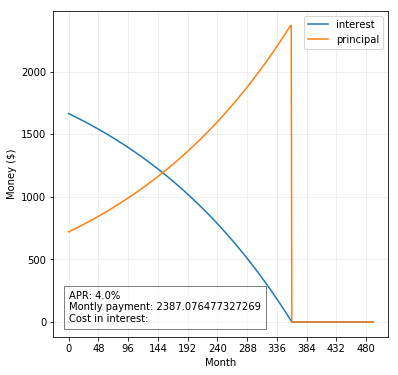

In [93]:
loan_remaining = loan_total
monthly_apr = apr / 12
months_in_a_year = 12
monthly_payment = (monthly_apr * loan_remaining) / (1 - (1 + monthly_apr)**(-(loan_duration_in_years * months_in_a_year)))
print('APR: {}%'.format(apr * 100))
print('Monthly payment:', moneyfmt(monthly_payment))

loan_remaining_history = [loan_remaining]
interest_paid_history = []
principal_paid_history = []
while loan_remaining > 0:
    interest_paid = loan_remaining * monthly_apr
    if interest_paid > loan_remaining: interest_paid = loan_remaining
    interest_paid_history.append(interest_paid)
    
    
    principal_paid = monthly_payment - interest_paid
    if principal_paid + interest_paid > loan_remaining: principal_paid = loan_remaining - interest_paid
    principal_paid_history.append(principal_paid)
    
    loan_remaining = loan_remaining - principal_paid
    loan_remaining_history.append(loan_remaining)
    
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6, 6)
ax = fig.gca()

ax.text(0, 0, 
        'APR: {0}%\nMontly payment: {1}\nCost in interest: '.format(apr * 100, monthly_payment), 
        bbox = {
                'facecolor':'white', 
                'alpha': 0.5, 
                'pad': 5 
            }
       )

ax.set_xticks(np.arange(0, len(interest_paid_history), 24*2))
ax.set_yticks(np.arange(0, max(principal_paid_history), 500))
plt.grid(alpha=.25)

plt.plot(range(0, len(interest_paid_history)), interest_paid_history, label = 'interest')
plt.plot(range(0, len(principal_paid_history)), principal_paid_history, label = 'principal')
plt.xlabel('Month')
plt.ylabel('Money ($)')
plt.legend()


print('Total interest:', moneyfmt( sum(interest_paid_history) ))
print('Total:', moneyfmt( sum(interest_paid_history) + sum(principal_paid_history) ))

In [ ]:
# TODO
# 1. Calculate percentage 